In [284]:
#https://stats.stackexchange.com/questions/235755/is-it-a-good-idea-to-normalize-the-data-consecutively-in-two-different-methods
# Reuse of normalization
#https://datascience.stackexchange.com/questions/39932/feature-scaling-both-training-and-test-data
# Cond VAE
#https://agustinus.kristia.de/techblog/2016/12/17/conditional-vae/

# Normalization
#https://stackoverflow.com/questions/43302871/do-you-apply-min-max-scaling-separately-on-training-and-test-data?rq=1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

case_to_evaluate="9_3_2"
percentage_per_case= "0_2"

In [285]:
combined_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/combined_imputed_cells.csv")
combined_replaced_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/combined_replaced_cells.csv")
combined_test_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/combined_test_cells.csv")
combined_train_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/combined_train_cells.csv")
combined_val_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/combined_val_cells.csv")

In [286]:
features = pd.read_csv(f"data/{case_to_evaluate}/features_to_impute.csv")
features = features["0"].to_list()
features

['pERK',
 'Rad51',
 'CCND1',
 'Vimentin',
 'aSMA',
 'Ecad',
 'ER',
 'PR',
 'EGFR',
 'pRB',
 'CD45',
 'Ki67',
 'CK19',
 'p21',
 'CK14',
 'AR',
 'cPARP',
 'CK17',
 'CK7',
 'HER2',
 'Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Solidity',
 'Extent',
 'Eccentricity']

## Check mean and variance of normalized data

In [287]:
test_subset = pd.DataFrame(combined_test_cells.loc[:, combined_test_cells.columns != 'Radius'].copy().mean())
train_subset = pd.DataFrame(combined_train_cells.loc[:, combined_train_cells.columns != 'Radius'].copy().mean())
val_subset = pd.DataFrame(combined_val_cells.loc[:, combined_val_cells.columns != 'Radius'].copy().mean())

train_subset.reset_index(inplace=True)
train_subset.rename(columns={0: "Mean", "index": "Feature"}, inplace=True)

test_subset.reset_index(inplace=True)
test_subset.rename(columns={0: "Mean", "index": "Feature"}, inplace=True)

val_subset.reset_index(inplace=True)
val_subset.rename(columns={0: "Mean", "index": "Feature"}, inplace=True)

test_subset.to_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/test_cells_normalized_mean.csv", index=False)
train_subset.to_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/train_cells_normalized_mean.csv", index=False)
val_subset.to_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/val_cells_normalized_mean.csv", index=False)

/var/folders/_5/43xzfz3s7s39pd__1mjxhghs8mhgqx/T/ipykernel_1935/3990700493.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_subset = pd.DataFrame(combined_test_cells.loc[:, combined_test_cells.columns != 'Radius'].copy().mean())
/var/folders/_5/43xzfz3s7s39pd__1mjxhghs8mhgqx/T/ipykernel_1935/3990700493.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_subset = pd.DataFrame(combined_train_cells.loc[:, combined_train_cells.columns != 'Radius'].copy().mean())
/var/folders/_5/43xzfz3s7s39pd__1mjxhghs8mhgqx/T/ipykernel_1935/3990700493.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is depr

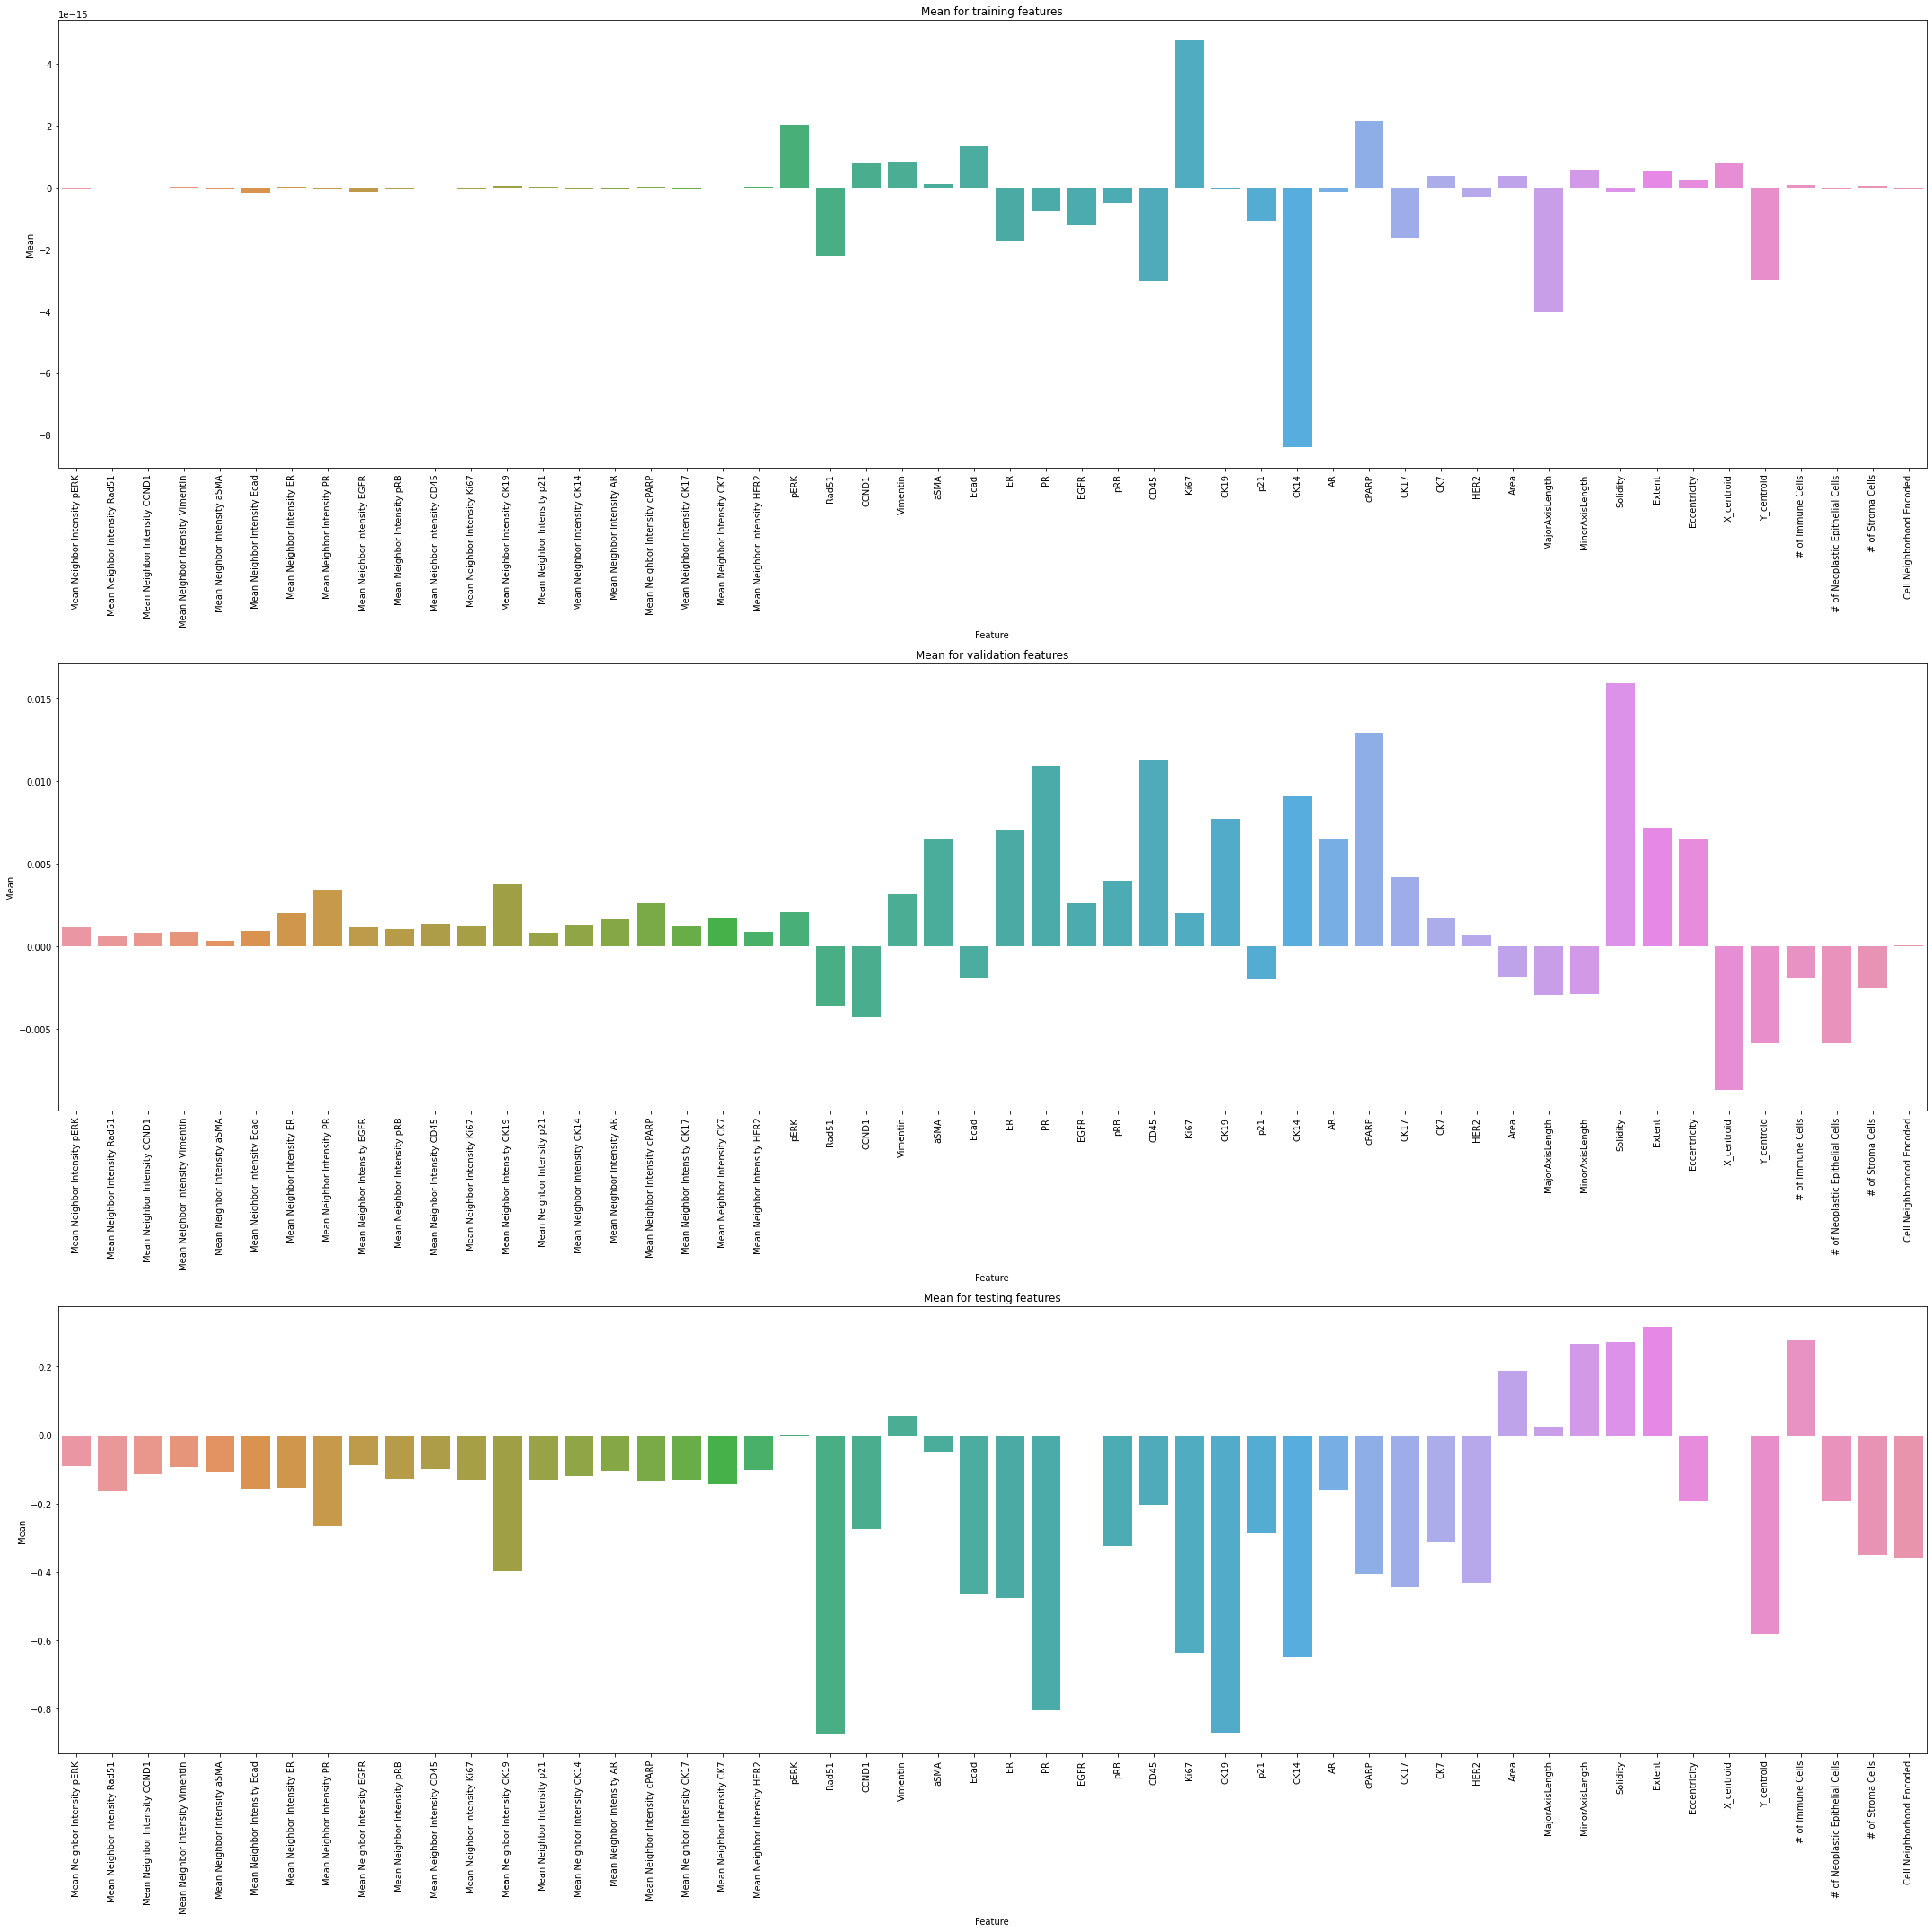

In [288]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(30, 30))
sns.barplot(x="Feature", y="Mean", data=train_subset, ax=ax1)
sns.barplot(x="Feature", y="Mean", data=val_subset, ax=ax2)
sns.barplot(x="Feature", y="Mean", data=test_subset, ax=ax3)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
        
ax1.set_title("Mean for training features")
ax2.set_title("Mean for validation features")
ax3.set_title("Mean for testing features")
        
        
plt.tight_layout()
plt.savefig(f'data/{case_to_evaluate}/vae_normal/{percentage_per_case}/mean.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

In [289]:
test_subset = pd.DataFrame(combined_test_cells.loc[:, combined_test_cells.columns != 'Radius'].copy().var())
train_subset = pd.DataFrame(combined_train_cells.loc[:, combined_train_cells.columns != 'Radius'].copy().var())
val_subset = pd.DataFrame(combined_val_cells.loc[:, combined_val_cells.columns != 'Radius'].copy().var())

train_subset.reset_index(inplace=True)
train_subset.rename(columns={0: "Variance", "index": "Feature"}, inplace=True)

test_subset.reset_index(inplace=True)
test_subset.rename(columns={0: "Variance", "index": "Feature"}, inplace=True)

val_subset.reset_index(inplace=True)
val_subset.rename(columns={0: "Variance", "index": "Feature"}, inplace=True)

test_subset.to_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/test_cells_normalized_var.csv", index=False)
train_subset.to_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/train_cells_normalized_var.csv", index=False)
val_subset.to_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/val_cells_normalized_var.csv", index=False)

/var/folders/_5/43xzfz3s7s39pd__1mjxhghs8mhgqx/T/ipykernel_1935/165939115.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_subset = pd.DataFrame(combined_test_cells.loc[:, combined_test_cells.columns != 'Radius'].copy().var())
/var/folders/_5/43xzfz3s7s39pd__1mjxhghs8mhgqx/T/ipykernel_1935/165939115.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_subset = pd.DataFrame(combined_train_cells.loc[:, combined_train_cells.columns != 'Radius'].copy().var())
/var/folders/_5/43xzfz3s7s39pd__1mjxhghs8mhgqx/T/ipykernel_1935/165939115.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecate

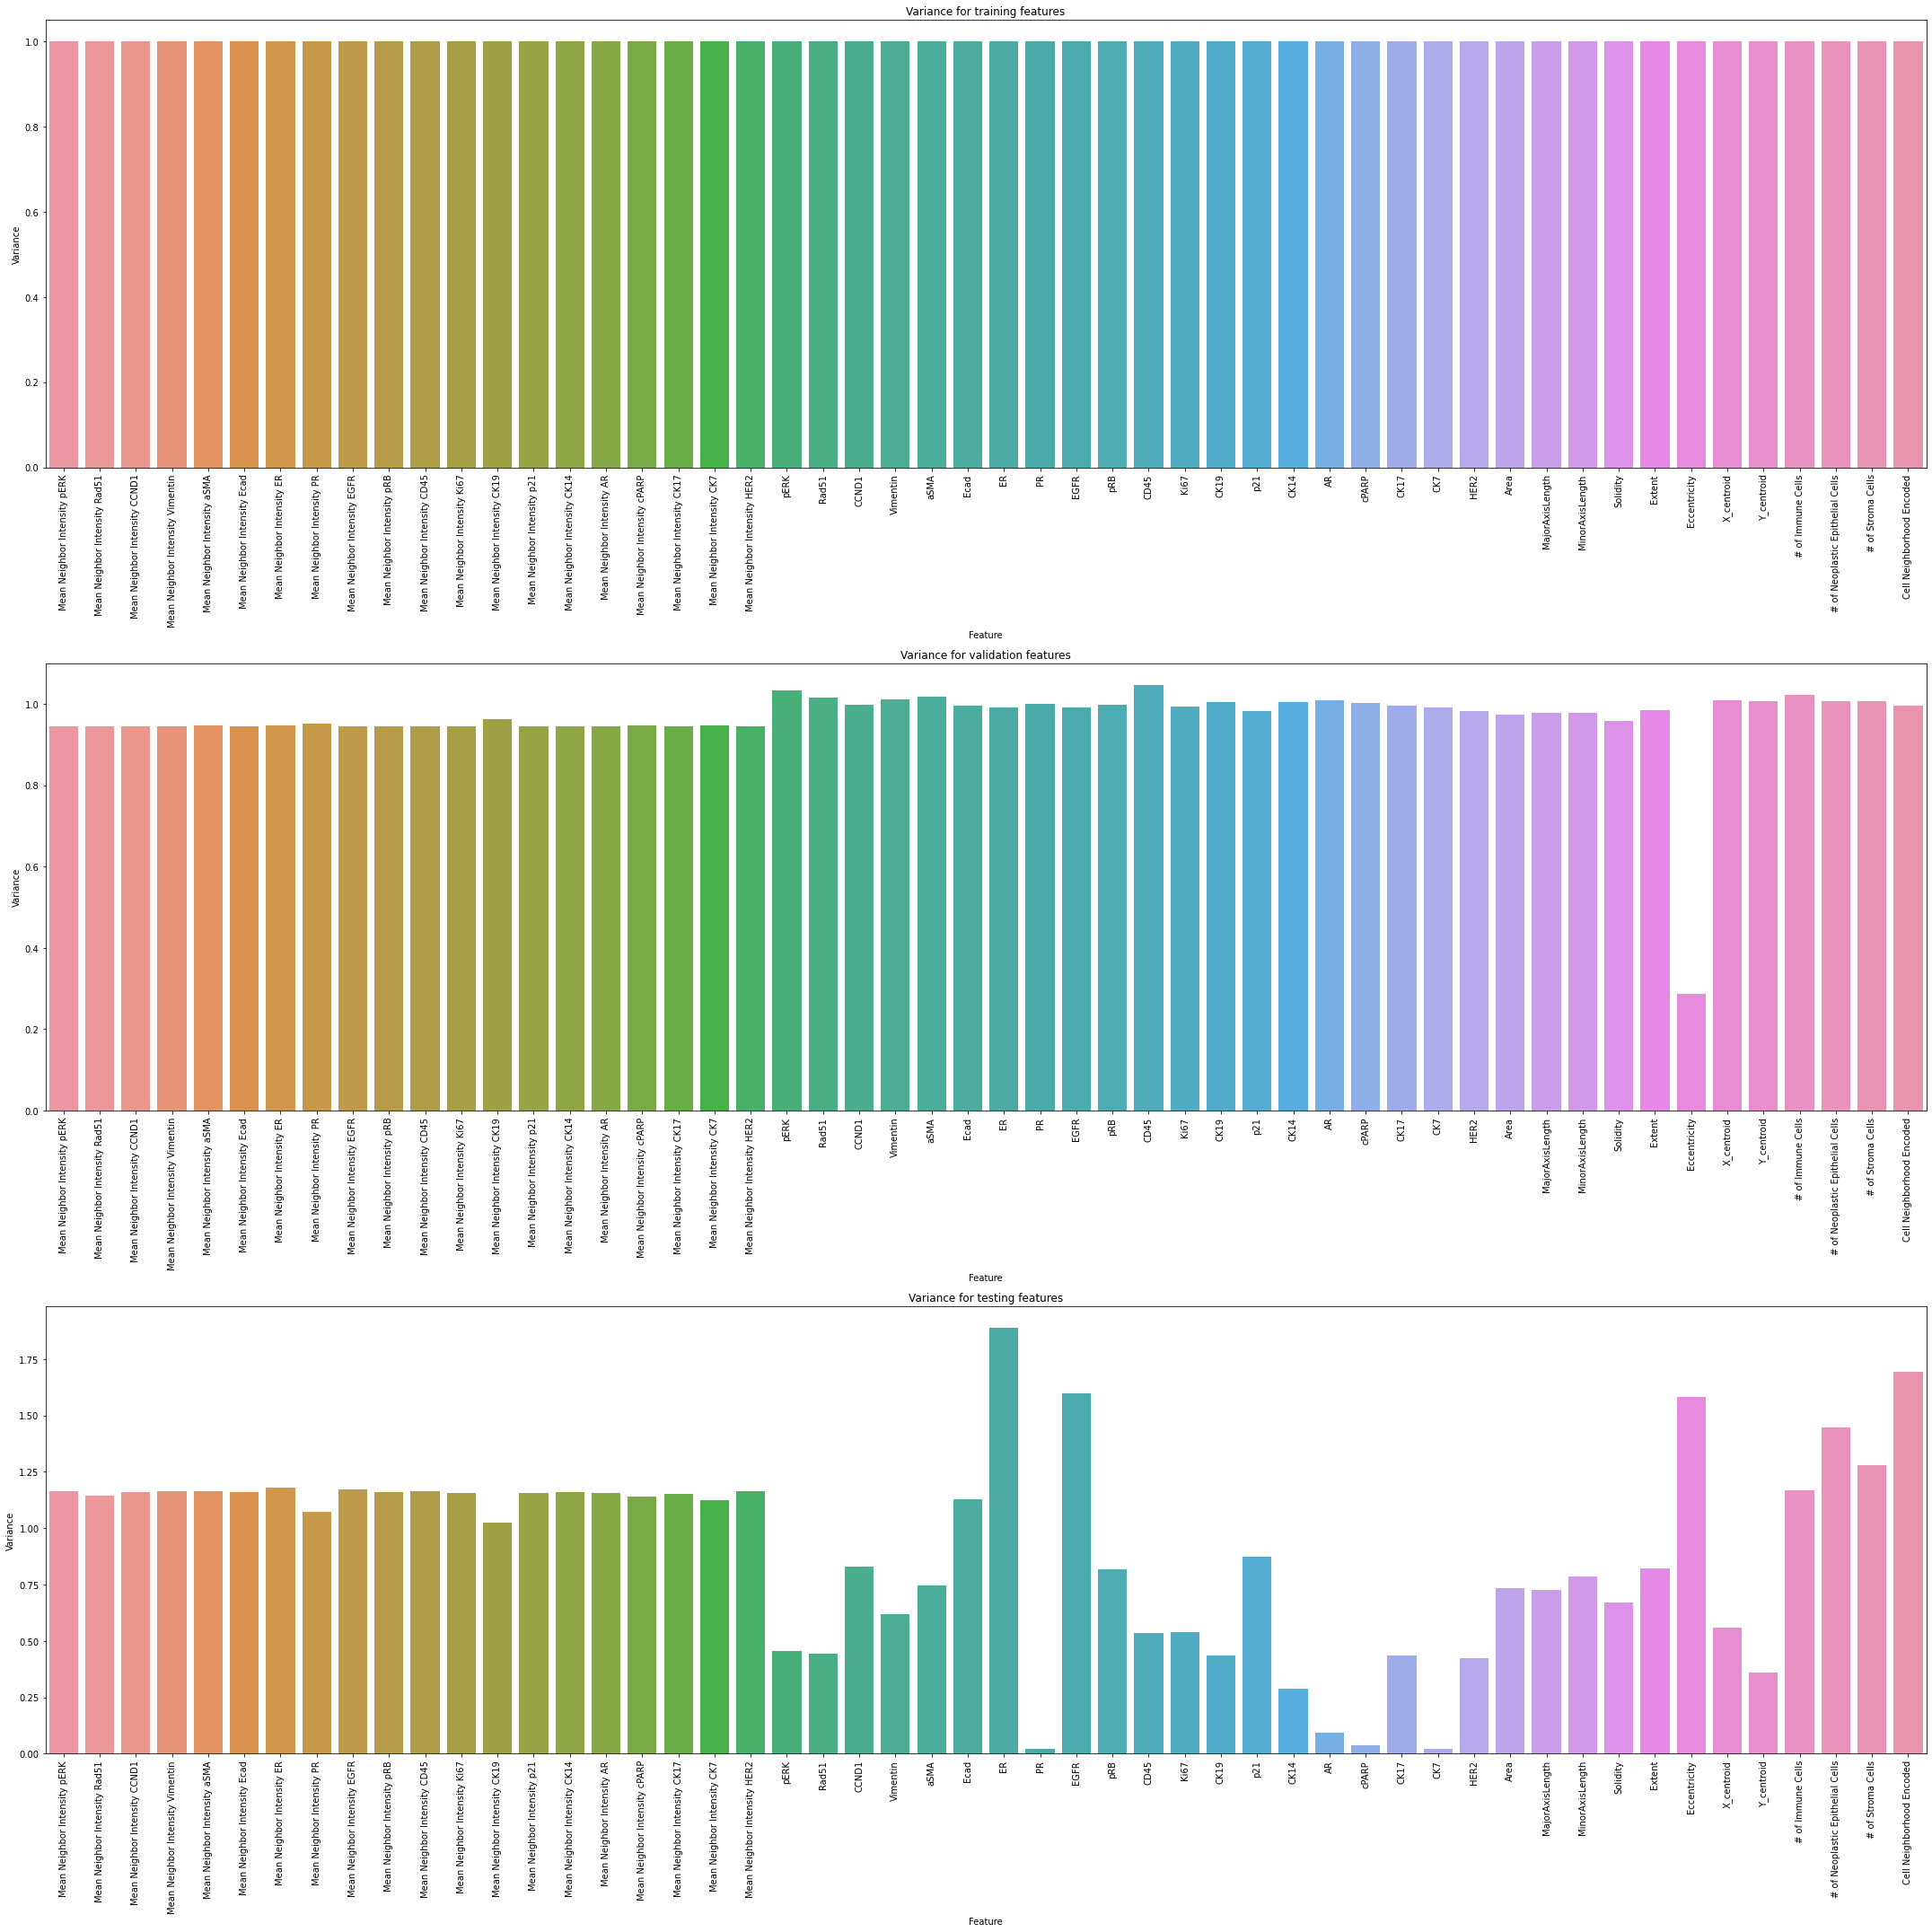

In [290]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(30,30))
sns.barplot(x="Feature", y="Variance", data=train_subset, ax=ax1)
sns.barplot(x="Feature", y="Variance", data=val_subset, ax=ax2)
sns.barplot(x="Feature", y="Variance", data=test_subset, ax=ax3)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
ax1.set_title("Variance for training features")
ax2.set_title("Variance for validation features")
ax3.set_title("Variance for testing features")
plt.tight_layout()
plt.savefig(f'data/{case_to_evaluate}/vae_normal/{percentage_per_case}/standard_deviation.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

###  Check correlation

In [291]:
train_subset = combined_train_cells.loc[:, combined_train_cells.columns != 'Radius'].copy()
train_correlation = train_subset[features].copy().corr()

val_subset = combined_val_cells.loc[:, combined_val_cells.columns != 'Radius'].copy()
val_correlation = val_subset[features].copy().corr()

test_subset = combined_test_cells.loc[:, combined_test_cells.columns != 'Radius'].copy()
test_correlation = test_subset[features].copy().corr()

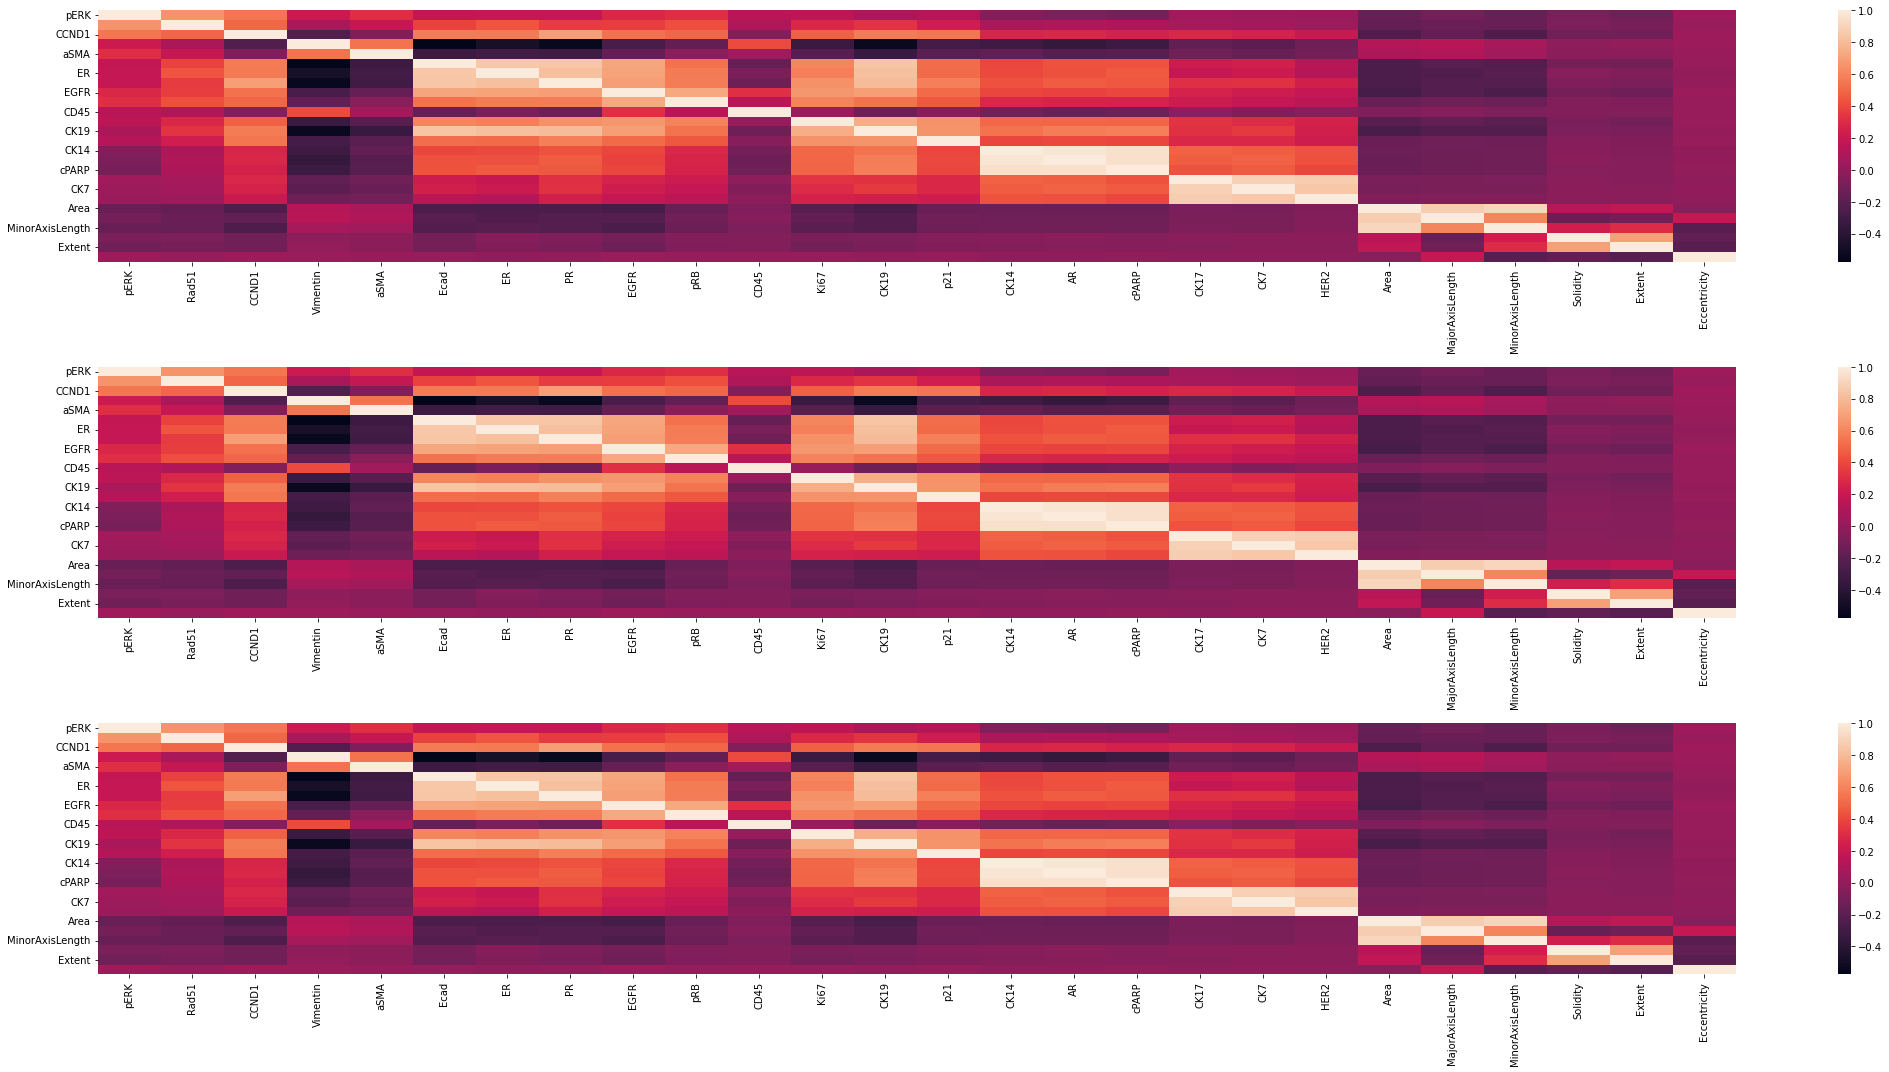

In [292]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(30,15))
sns.heatmap(correlation, ax=ax1)
sns.heatmap(correlation, ax=ax2)
sns.heatmap(correlation, ax=ax3)
plt.tight_layout()
plt.savefig(f'data/{case_to_evaluate}/vae_normal/{percentage_per_case}/feature_correlation.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

In [293]:
combined_test_cells["Cell Neighborhood Encoded"].value_counts()

 0.164609    17526
 0.361710     5941
 0.400475     5898
 0.372900     5835
 0.391459     5813
-2.865585     5714
-2.772543     5684
 0.389124     5676
-2.631461     5602
-2.564331     5184
 0.344212     4945
 0.355845     4898
 0.375069     4698
 0.384400     4427
-2.631000     4048
 0.372749     3972
 0.409755     2427
 0.344756     1877
 0.400743     1739
 0.411881     1722
 0.356919     1715
 0.347050     1572
 0.403089     1482
 0.326690     1431
 0.314298     1348
 0.385000     1315
 0.374125     1232
 0.118540      818
 0.420727      793
 0.081973      594
 0.394386      576
 0.412109      572
 0.383756      559
-6.625613      306
 0.019462      276
 0.144485      219
Name: Cell Neighborhood Encoded, dtype: int64

# Index Replacements

In [294]:
index_replacements = pd.read_csv(f"data/{case_to_evaluate}/index_replacements.csv")
#index_replacements
index_replacements = index_replacements.T.to_dict()

# R2 calculation

In [295]:
from typing import List, Dict
from sklearn.metrics import r2_score

def evaluate_performance(features: List, index_replacements: Dict, test_data: pd.DataFrame,
                             imputed_data: pd.DataFrame):
        """
        Evaluates the performance per feature
        @param features:
        @param index_replacements:
        @param test_data:
        @param imputed_data:
        @return: Returns a dataframe with r2 scores for performance evaluation
        """
        score_data: List = []

        for feature in features:
            if "X_centroid" in feature or "Y_centroid" in feature or "Origin" in feature:
                continue

            # Store all cell indexes, to be able to select the correct cells later for r2 comparison
            cell_indexes_to_compare: list = []
            for key, replaced_features in index_replacements.items():
                key = int(key)
                replaced_features = list(replaced_features.values())
                
                if feature in replaced_features:
                    cell_indexes_to_compare.append(key)
           
            score = r2_score(test_data[feature].loc[cell_indexes_to_compare],
                                  imputed_data[feature].loc[cell_indexes_to_compare])
                    
            score_data.append({
                "Feature": feature,
                "Score": score if score >= 0 else 0
            })

        return pd.DataFrame().from_records(score_data)

In [296]:
combined_r2_scores_data = []
for radius in combined_test_cells["Radius"].unique():
    selected_test_cells = combined_test_cells[combined_test_cells["Radius"] == radius].reset_index(drop=True)
    selected_imputed_cells = combined_imputed_cells[combined_imputed_cells["Radius"] == radius].reset_index(drop=True)
    r2_scores = evaluate_performance(features, index_replacements, selected_test_cells, selected_imputed_cells)
    r2_scores["Radius"] = radius
    combined_r2_scores_data.append(r2_scores)
    
combined_r2_scores = pd.concat(combined_r2_scores_data)
combined_r2_scores.to_csv(f"data/{case_to_evaluate}/vae_normal/{percentage_per_case}/combined_r2_scores.csv", index=False)
combined_r2_scores

,Feature,Score,Radius
0,pERK,0.040020,10
1,Rad51,0.000000,10
2,CCND1,0.067134,10
3,Vimentin,0.122321,10
4,aSMA,0.000000,10
...,...,...,...
21,MajorAxisLength,0.665003,100
22,MinorAxisLength,0.687733,100
23,Solidity,0.352681,100
24,Extent,0.435679,100


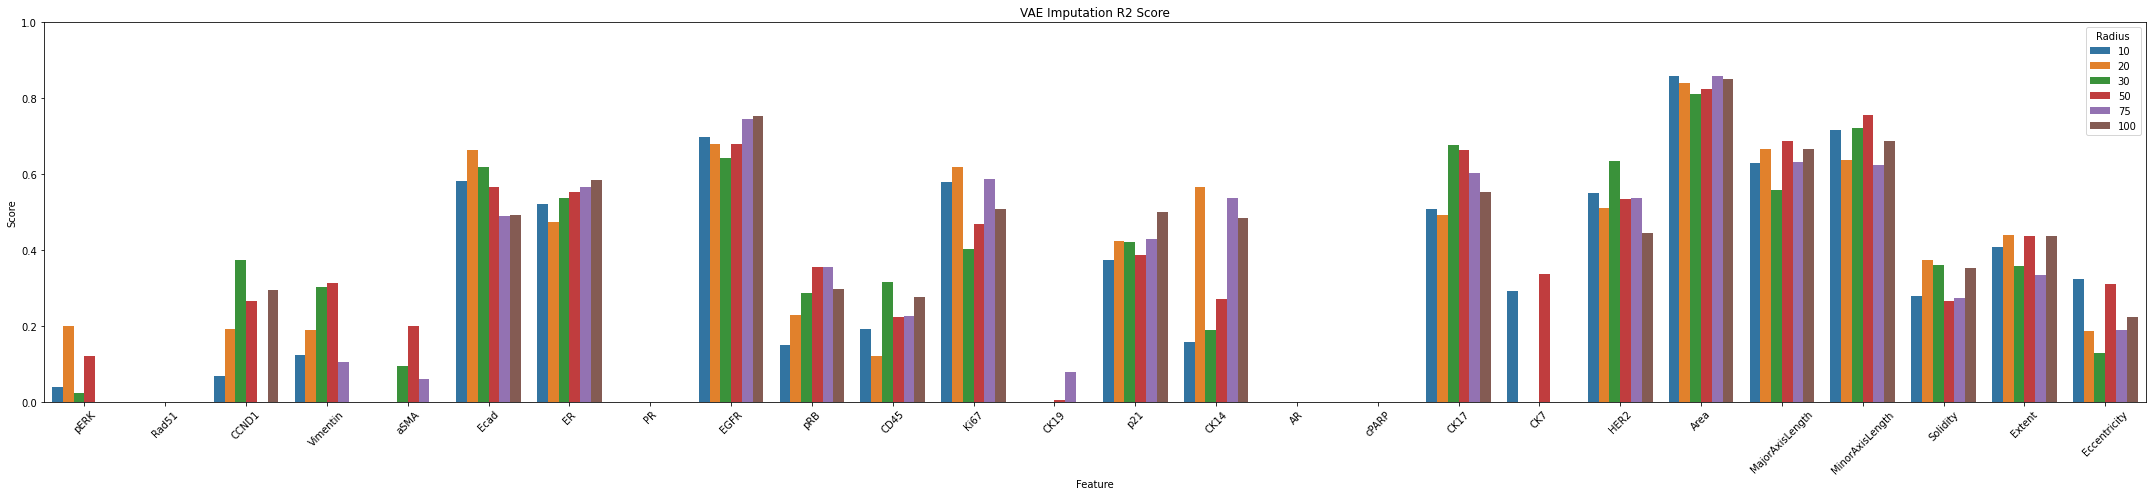

In [297]:
fig = plt.figure()
sns.barplot(x="Feature", y="Score",hue="Radius", data=combined_r2_scores)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
fig.set_size_inches(30,7)
plt.title("VAE Imputation R2 Score") 
plt.tight_layout()
plt.ylim(0,1)
plt.savefig(f'data/{case_to_evaluate}/vae_normal/{percentage_per_case}/combined_r2_scores.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')
# plt.show()


## Correlation between mean, var and scores

In [298]:
test_mean_set = combined_test_cells[combined_test_cells["Radius"] == 10]
test_mean_set = pd.DataFrame(test_mean_set[features].copy().mean())
test_mean_set.reset_index(inplace=True)
test_mean_set.rename(columns={"index": "Feature", 0 : "Mean"}, inplace=True)


test_var_set = combined_test_cells[combined_test_cells["Radius"] == 10]
test_var_set = pd.DataFrame(test_var_set[features].copy().var())
test_var_set.reset_index(inplace=True)
test_var_set.rename(columns={"index": "Feature", 0 : "Variance"}, inplace=True)
temp_scores = combined_r2_scores[combined_r2_scores["Radius"] == 10][["Feature", "Score"]]



mean_var_scores = pd.concat([test_mean_set, test_var_set, temp_scores], axis=1)
mean_var_scores.drop(columns=["Feature"], inplace=True)
mean_var_scores["Feature"] = temp_scores["Feature"].values
mean_var_scores_corr = mean_var_scores.corr()
mean_var_scores_corr

,Mean,Variance,Score
Mean,1.000000,0.256690,0.360202
Variance,0.256690,1.000000,0.479298
Score,0.360202,0.479298,1.000000


<Figure size 432x288 with 0 Axes>

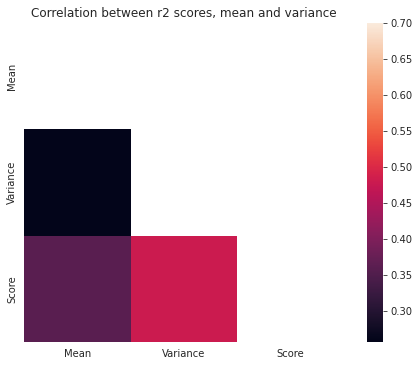

In [299]:
fig = plt.figure()
mask = np.zeros_like(mean_var_scores_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(mean_var_scores_corr, mask=mask, vmax=.7, square=True)


plt.tight_layout()
plt.title("Correlation between r2 scores, mean and variance")
plt.savefig(f'data/{case_to_evaluate}/vae_normal/{percentage_per_case}/mean_vae_scores_correlation.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

# 0.2 - 1.0 data replacement VAE Test

In [300]:
vae_0_2_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/0_2/combined_imputed_cells.csv")
vae_0_2_test_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/0_2/combined_test_cells.csv")
vae_0_2_imputed_cells["Percentage"] = 0.2
vae_0_2_test_cells["Percentage"] = 0.2

vae_0_4_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/0_4/combined_imputed_cells.csv")
vae_0_4_test_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/0_4/combined_test_cells.csv")
vae_0_4_imputed_cells["Percentage"] = 0.4
vae_0_4_test_cells["Percentage"] = 0.4

vae_0_6_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/0_6/combined_imputed_cells.csv")
vae_0_6_test_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/0_6/combined_test_cells.csv")
vae_0_6_imputed_cells["Percentage"] = 0.6
vae_0_6_test_cells["Percentage"] = 0.6

vae_0_8_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/0_8/combined_imputed_cells.csv")
vae_0_8_test_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/0_8/combined_test_cells.csv")
vae_0_8_imputed_cells["Percentage"] = 0.8
vae_0_8_test_cells["Percentage"] = 0.8

vae_1_0_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/1_0/combined_imputed_cells.csv")
vae_1_0_test_cells = pd.read_csv(f"data/{case_to_evaluate}/vae_normal/1_0/combined_test_cells.csv")
vae_1_0_imputed_cells["Percentage"] = 1.0
vae_1_0_test_cells["Percentage"] = 1.0

In [301]:
combined_all_percentage_imputed_cells = pd.concat([vae_0_2_imputed_cells, vae_0_4_imputed_cells, vae_0_6_imputed_cells, vae_0_8_imputed_cells, vae_1_0_imputed_cells])
combined_all_percentage_imputed_cells

,CK14,CK17,Rad51,Mean Neighbor Intensity p21,cPARP,CK7,pRB,CD45,Mean Neighbor Intensity Rad51,Mean Neighbor Intensity Ki67,...,CK19,# of Immune Cells,Ecad,Mean Neighbor Intensity CD45,Mean Neighbor Intensity HER2,Mean Neighbor Intensity cPARP,Mean Neighbor Intensity CK19,EGFR,Radius,Percentage
0,-0.764802,-0.679347,-1.566029,-0.512521,-0.469452,-0.338814,-1.065411,-0.949886,-0.512532,-0.512533,...,-1.541307,-0.110248,-1.840185,-0.512536,-0.512539,-0.512518,-0.512266,-1.147294,10,0.2
1,-0.393905,-0.724920,-2.581689,-0.512521,-0.481966,-0.322741,-1.485324,-0.272814,-0.512532,-0.512533,...,-1.230489,-0.110248,-2.098723,-0.512536,-0.512539,-0.512518,-0.512266,-2.003947,10,0.2
2,-0.302310,-0.680037,-4.857834,-0.512521,0.202449,-0.354862,-1.807598,-1.338710,-0.512532,-0.512533,...,-1.509097,-0.110248,-2.194322,-0.512536,-0.512539,-0.512518,-0.512266,-2.666691,10,0.2
3,-0.664227,-0.686686,-2.188337,-0.512521,-0.383472,-0.339037,-1.645574,-1.206711,-0.512532,-0.512533,...,-1.562725,-0.110248,-2.206739,-0.512536,-0.512539,-0.512518,-0.512266,-2.658004,10,0.2
4,-0.845484,-0.786834,-4.409171,-0.512521,-0.473523,-0.331430,-0.649218,-1.065538,-0.512532,-0.512533,...,-1.480428,-0.110248,-2.140590,-0.512536,-0.512539,-0.512518,-0.512266,-1.455494,10,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,-0.805727,-0.873009,-4.846608,-0.251116,-0.471976,-0.381141,-1.878448,-1.325709,-0.777594,-0.127396,...,-1.511377,5.000000,-2.177088,-0.092416,0.006075,-0.076833,-1.070514,-2.759040,100,1.0
118430,-0.740822,-0.700590,-4.920115,-0.252201,-0.477025,-0.322454,-1.807277,-1.322796,-0.775332,-0.128305,...,-1.523882,5.000000,-2.187049,-0.092469,0.005260,-0.076618,-1.068929,-2.699448,100,1.0
118431,-0.896039,-0.865723,-4.438928,-0.252948,-0.471382,-0.364102,-1.868156,-0.656830,-0.726437,-0.139706,...,-1.555774,1.000000,-2.123846,-0.095645,0.001300,-0.075964,-1.086922,-2.204636,100,1.0
118432,-0.893286,-0.852042,-4.406974,-0.254919,-0.790139,-0.358963,-1.894017,-1.340158,-0.731796,-0.139951,...,-1.530102,1.000000,-2.200349,-0.094558,0.000672,-0.075931,-1.103726,-2.757004,100,1.0


In [302]:
combined_all_percentage_test_cells = pd.concat([vae_0_2_test_cells, vae_0_4_test_cells, vae_0_6_test_cells, vae_0_8_test_cells, vae_1_0_test_cells])
combined_all_percentage_test_cells

,Mean Neighbor Intensity pERK,Mean Neighbor Intensity Rad51,Mean Neighbor Intensity CCND1,Mean Neighbor Intensity Vimentin,Mean Neighbor Intensity aSMA,Mean Neighbor Intensity Ecad,Mean Neighbor Intensity ER,Mean Neighbor Intensity PR,Mean Neighbor Intensity EGFR,Mean Neighbor Intensity pRB,...,X_centroid,Y_centroid,# of Immune Cells,# of Neoplastic Epithelial Cells,# of Stroma Cells,Cell Neighborhood Encoded,Phenotype,Cell Neighborhood,Radius,Percentage
0,-0.512533,-0.512532,-0.512532,-0.512509,-0.512515,-0.512515,-0.512514,-0.512463,-0.512535,-0.512527,...,-0.086118,-4.875758,-0.110248,-0.46795,-0.142278,0.164609,Stroma (aSMA+),Unknown,10,0.2
1,-0.512533,-0.512532,-0.512532,-0.512509,-0.512515,-0.512515,-0.512514,-0.512463,-0.512535,-0.512527,...,-0.086176,-4.830006,-0.110248,-0.46795,-0.142278,0.164609,Immune,Unknown,10,0.2
2,-0.512533,-0.512532,-0.512532,-0.512509,-0.512515,-0.512515,-0.512514,-0.512463,-0.512535,-0.512527,...,0.857848,-2.809511,-0.110248,-0.46795,-0.142278,0.164609,Basal,Unknown,10,0.2
3,-0.512533,-0.512532,-0.512532,-0.512509,-0.512515,-0.512515,-0.512514,-0.512463,-0.512535,-0.512527,...,-0.105133,-2.505111,-0.110248,-0.46795,-0.142278,0.164609,Immune,Unknown,10,0.2
4,-0.512533,-0.512532,-0.512532,-0.512509,-0.512515,-0.512515,-0.512514,-0.512463,-0.512535,-0.512527,...,-0.600122,-2.120279,-0.110248,-0.46795,-0.142278,0.164609,Immune,Unknown,10,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,-0.528348,-0.777594,-0.578705,-0.470381,-0.562725,-0.642444,-1.155150,-0.426479,-0.323512,-0.362722,...,1.302086,0.797139,5.000000,0.00000,0.000000,1.000000,Immune,Immune,100,1.0
118430,-0.527611,-0.775332,-0.577706,-0.464579,-0.562088,-0.641884,-1.150434,-0.426420,-0.325030,-0.365430,...,1.298643,0.797429,5.000000,0.00000,0.000000,1.000000,Immune,Immune,100,1.0
118431,-0.479004,-0.726437,-0.590104,-0.477272,-0.571514,-0.654605,-1.178197,-0.432898,-0.348354,-0.405001,...,0.900791,0.813555,1.000000,0.00000,0.000000,1.000000,Immune,Immune,100,1.0
118432,-0.481769,-0.731796,-0.588065,-0.471967,-0.576139,-0.655351,-1.178641,-0.428664,-0.348949,-0.399640,...,0.901459,0.815657,1.000000,0.00000,0.000000,1.000000,Immune,Immune,100,1.0


In [303]:
radii = [10,20,30,50,75,100]
percentages = [0.2,0.4,0.6,0.8,1.0]

In [304]:
scores = []
for percentage in percentages:
    for radius in radii:
        r2_scores = evaluate_performance(features=features, index_replacements=index_replacements, test_data = 
                                  combined_all_percentage_test_cells[(combined_all_percentage_test_cells["Percentage"] == percentage) & (combined_all_percentage_test_cells["Radius"]== radius)].reset_index(drop=True), 
                                  imputed_data=combined_all_percentage_imputed_cells[(combined_all_percentage_imputed_cells["Percentage"] == percentage) & (combined_all_percentage_imputed_cells["Radius"] == radius)].reset_index(drop=True))
        r2_scores["Percentage"] = percentage
        r2_scores["Radius"] = radius
    
        scores.append(r2_scores)
    

all_percentage_scores = pd.concat(scores)
all_percentage_scores.reset_index(drop=True, inplace=True)
all_percentage_scores

,Feature,Score,Percentage,Radius
0,pERK,0.040020,0.2,10
1,Rad51,0.000000,0.2,10
2,CCND1,0.067134,0.2,10
3,Vimentin,0.122321,0.2,10
4,aSMA,0.000000,0.2,10
...,...,...,...,...
775,MajorAxisLength,0.566637,1.0,100
776,MinorAxisLength,0.661247,1.0,100
777,Solidity,0.385628,1.0,100
778,Extent,0.418046,1.0,100


In [305]:
mean_data = []

for percentage in all_percentage_scores["Percentage"].unique():
    for radius in all_percentage_scores["Radius"].unique():
        mean_data.append({
            "Percentage": percentage,
            "Radius": radius,
            "Score": all_percentage_scores[(all_percentage_scores["Percentage"] == percentage) & (all_percentage_scores["Radius"] == radius)]["Score"].mean()
        })
        
all_percentage_mean_scores = pd.DataFrame().from_records(mean_data)
all_percentage_mean_scores    

,Percentage,Radius,Score
0,0.2,10,0.309460
1,0.2,20,0.326814
2,0.2,30,0.325356
3,0.2,50,0.354690
4,0.2,75,0.316661
5,0.2,100,0.323401
6,0.4,10,0.299056
7,0.4,20,0.321168
8,0.4,30,0.338676
9,0.4,50,0.357207


## Plot all percentage mean performance

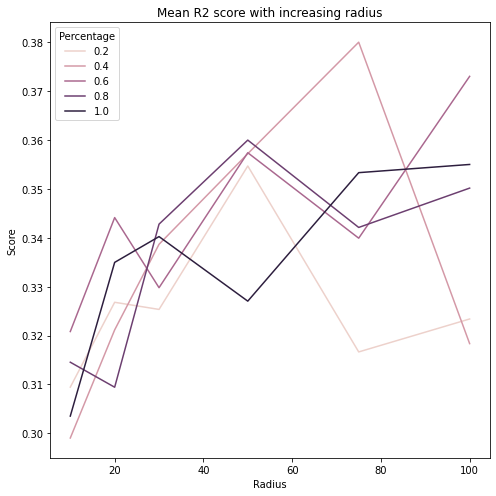

In [306]:
fig = plt.figure(figsize=(7, 7))
ax = sns.lineplot(data=all_percentage_mean_scores, x="Radius", y="Score", hue="Percentage")
#ax.fill_between(vae_x_fe_knn_scores.index, vae_x_fe_knn_scores.lower, vae_x_fe_knn_scores.upper, alpha=0.2)
plt.xlabel("Radius")

plt.title("Mean R2 score with increasing radius")
fig.tight_layout()
plt.savefig(f"data/{case_to_evaluate}/vae_all_percentage_mean_performance.png",facecolor='w')

## Plot all features for all percentages and radii

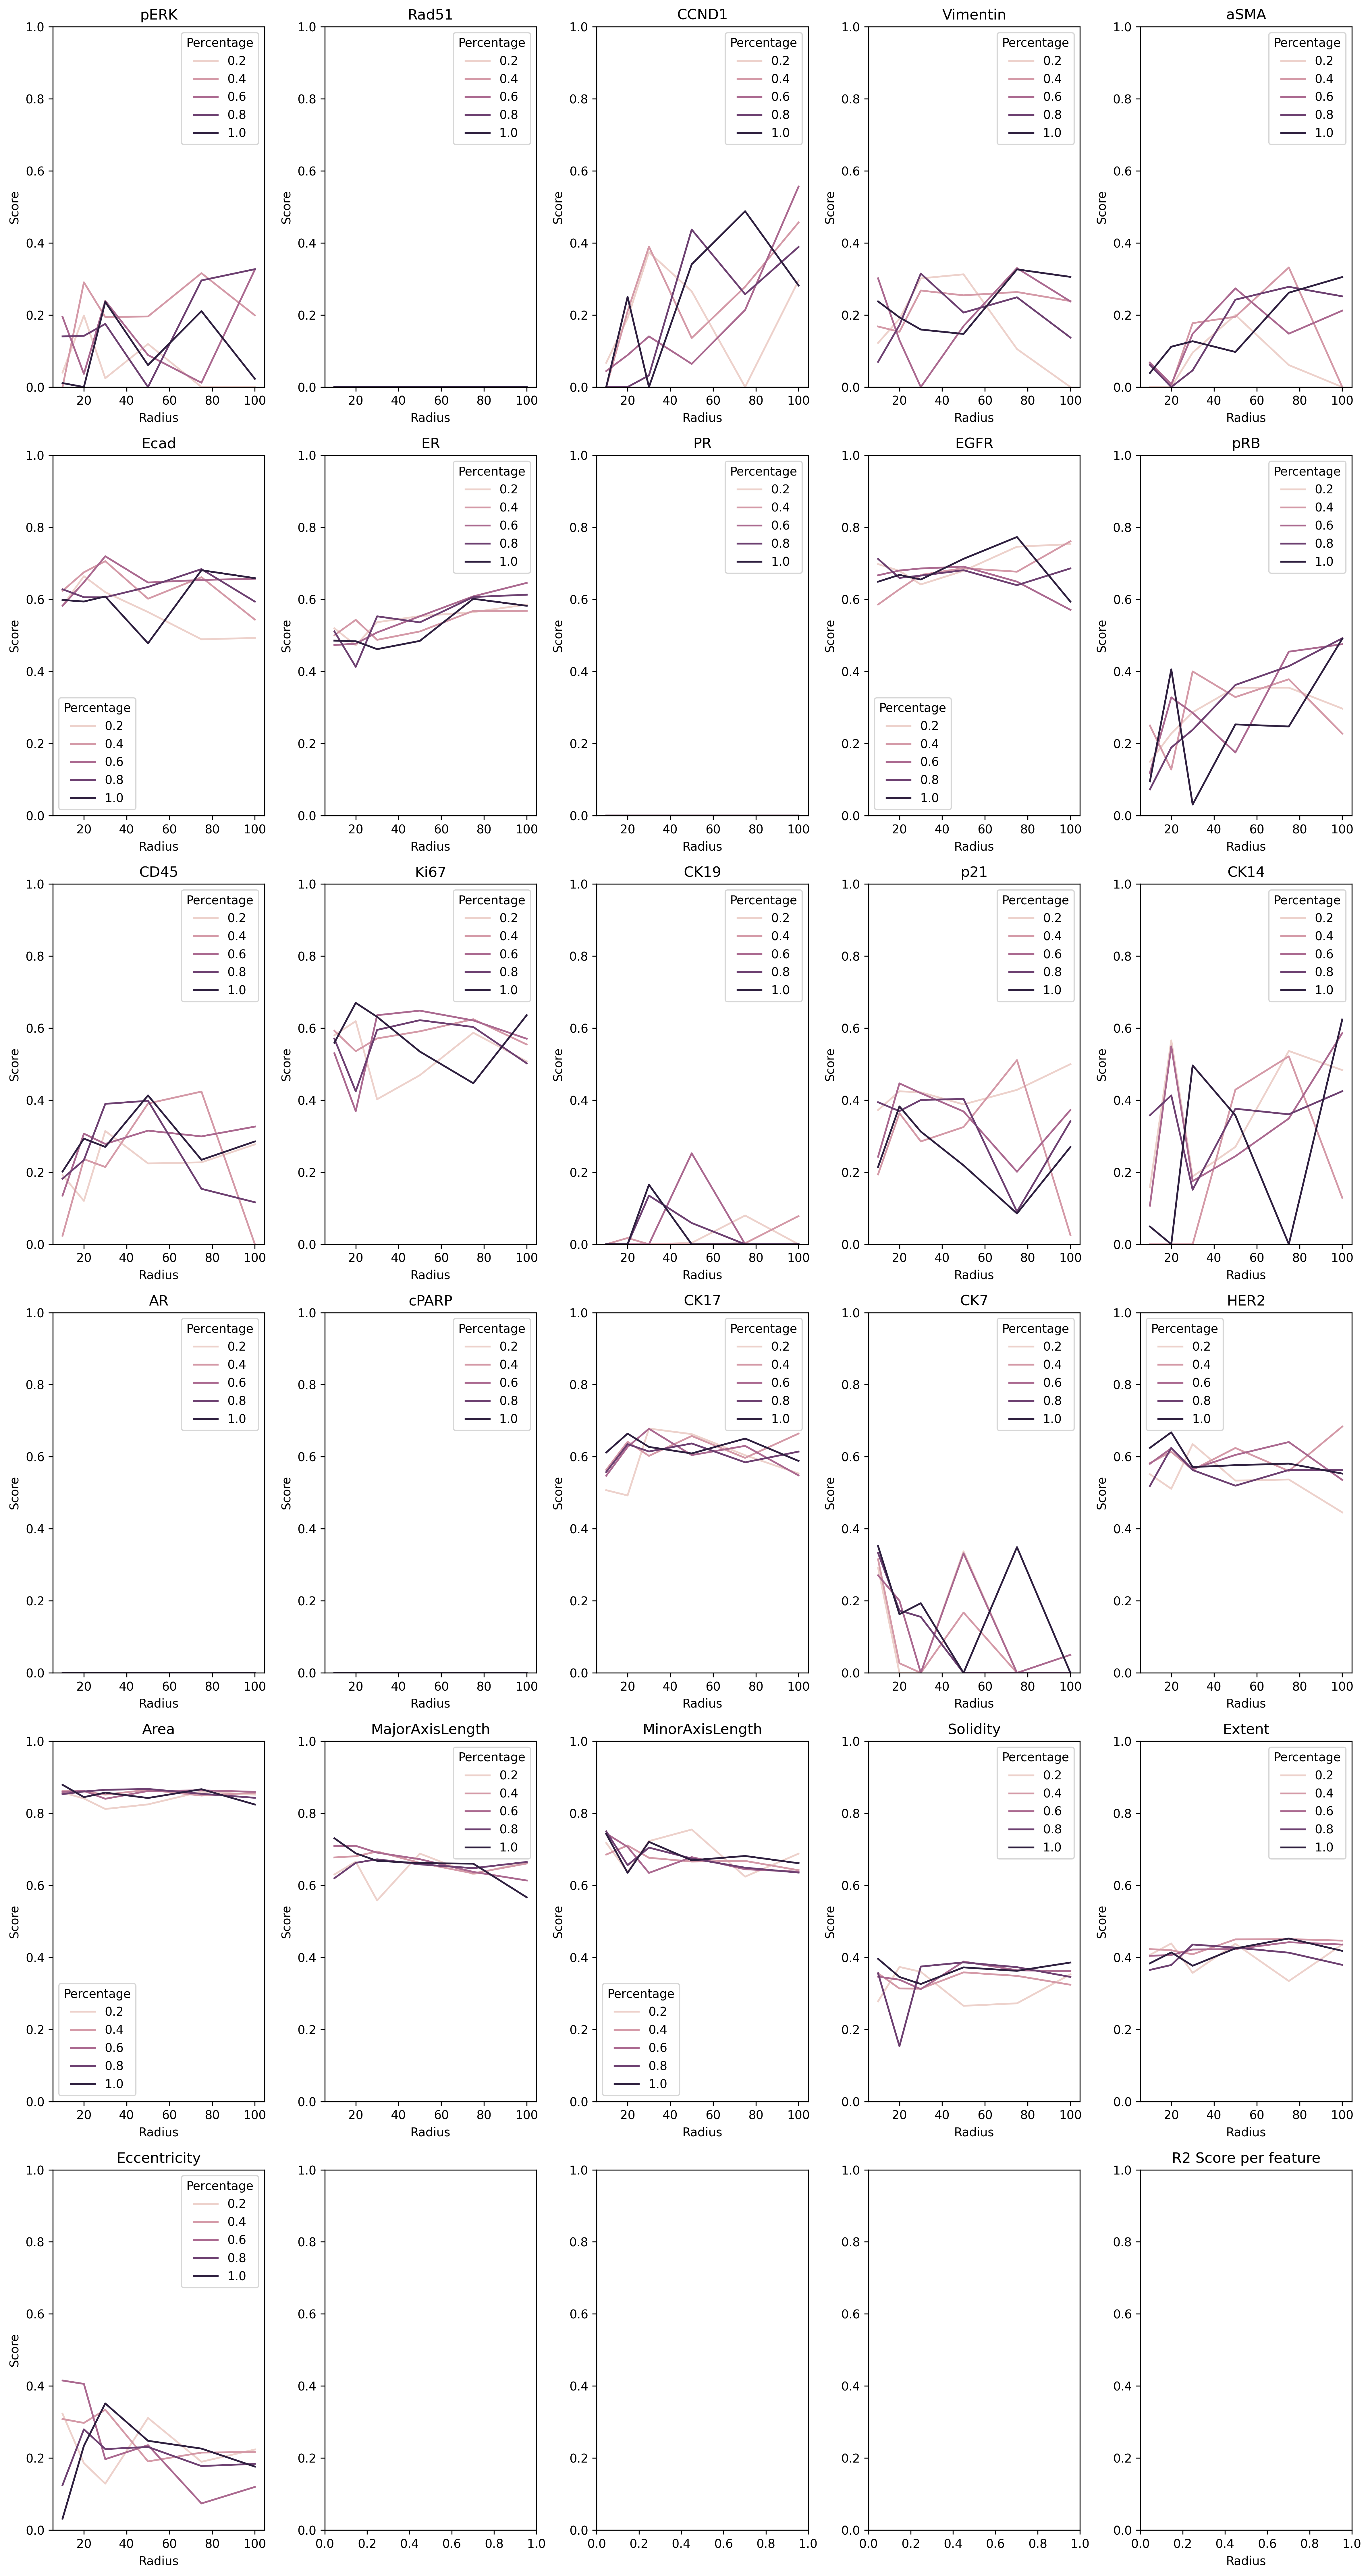

In [307]:
fig, axs = plt.subplots(6, 5, figsize=(16, 30), dpi=300)

row = 0
col = 0

for feature in all_percentage_scores["Feature"].unique():
    sns.lineplot(data=all_percentage_scores[all_percentage_scores["Feature"] == feature], x="Radius", y="Score", hue="Percentage", ax=axs[col, row])
    axs[col, row].set_title(feature)
    #axs[col, row].get_legend().remove()
    axs[col, row].set_ylim(0, 1)
    
    row +=1
    
    if row == 5:
        row = 0
        col += 1

        
#axs[0][0].legend()

plt.xlabel("Radius")
plt.title("R2 Score per feature")
fig.tight_layout()
plt.savefig(f"data/{case_to_evaluate}/vae_all_percentage_feature_performance.png",facecolor='w')